In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

In [2]:
df = pd.read_csv(r'E:\data\resume projects\laptop_data.csv')

In [3]:
df.sample(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1128,1128,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,No OS,2.4kg,52693.92
32,32,HP,Notebook,17.3,Full HD 1920x1080,AMD A6-Series 9220 2.5GHz,4GB,500GB HDD,AMD Radeon 530,Windows 10,2.71kg,23389.92
9,9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.60
751,751,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.84kg,101232.00
412,412,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,1TB HDD,AMD Radeon 520,Windows 10,2.1kg,24988.32


In [4]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [5]:
df= df.drop('Unnamed: 0' , axis=1)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
433,Lenovo,Workstation,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7600U 2.8GHz,16GB,512GB SSD,Nvidia GeForce 940MX,Windows 10,2.3kg,130269.6000
409,Lenovo,Notebook,11.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,2GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.15kg,16221.0960
940,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 965M,Windows 10,2.75kg,74538.7200
152,Lenovo,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 620,Windows 10,1.9kg,26533.4400
1240,Lenovo,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,31838.5296


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [7]:
for col in df.columns:
    print(col)
    print(df[col].nunique())
    print(df[col].unique())
    print('-- --'*18)

Company
19
['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
TypeName
6
['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
Inches
18
[13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
-- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- --
ScreenResolution
40
['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'IPS Panel Touchscreen 1920x1200' 'Touc

In [8]:
df['Ram']=df['Ram'].str.replace(r"[GB,']" , '' , regex = True)
df['Ram']=pd.to_numeric(df['Ram'],errors='coerce').astype(int)

In [9]:
df['Weight']=df['Weight'].str.replace(r"[kg,']" , '' , regex = True)
df['Weight']=pd.to_numeric(df['Weight'], errors='coerce').astype(float)

In [10]:
df.sample(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1214,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.9,103842.72
211,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.9,74964.96


In [11]:
df['Price']=df['Price'].astype(int)

In [12]:
df.sample(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1035,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.26,71874
986,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.04,42943


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   int32  
dtypes: float64(2), int32(2), object(7)
memory usage: 101.9+ KB


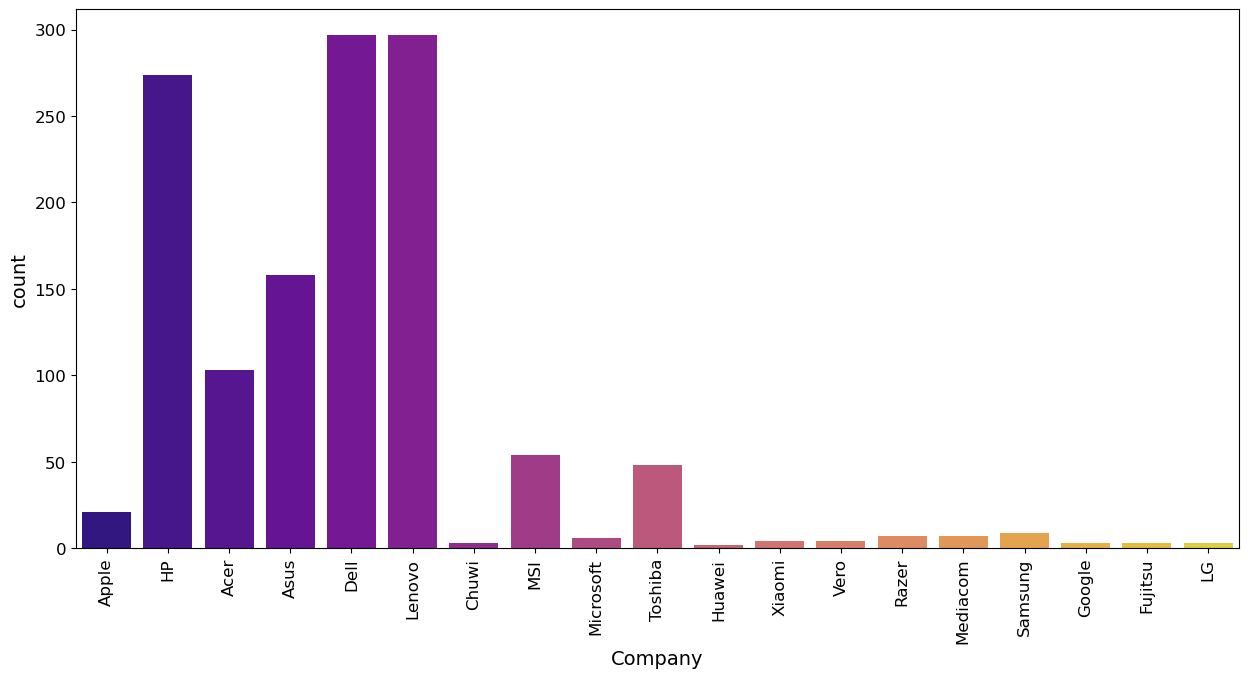

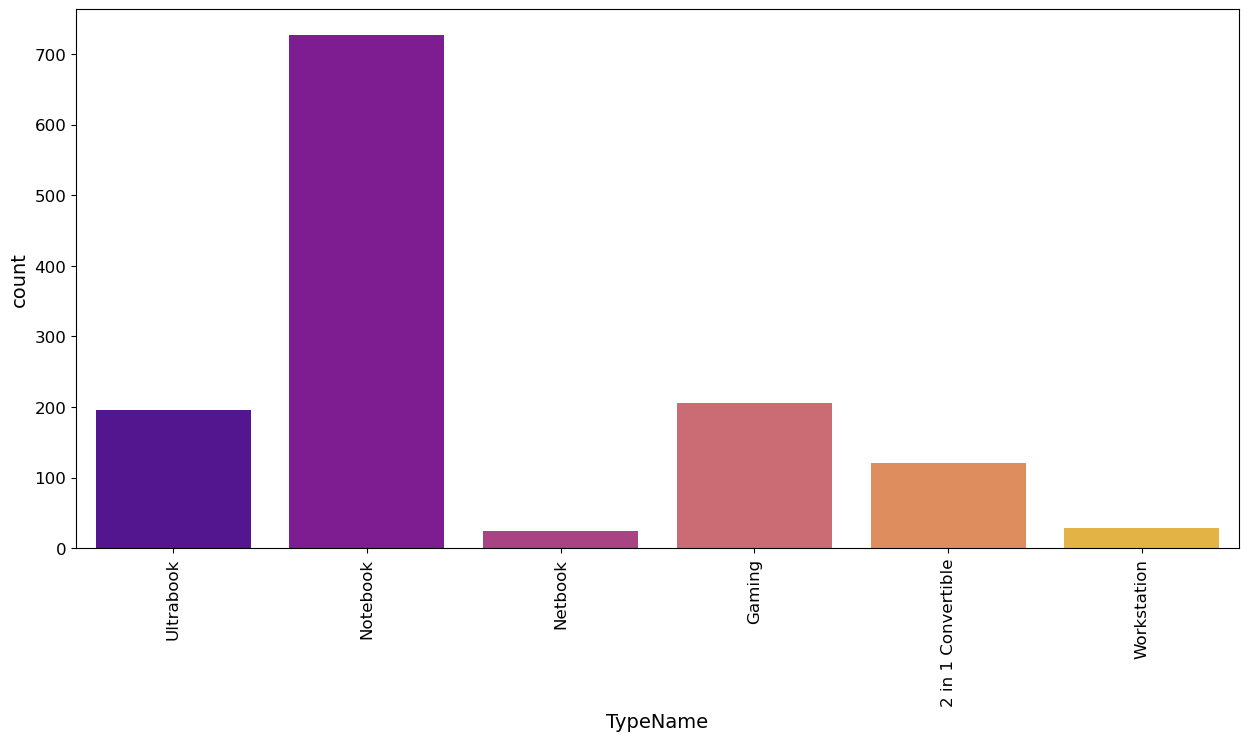

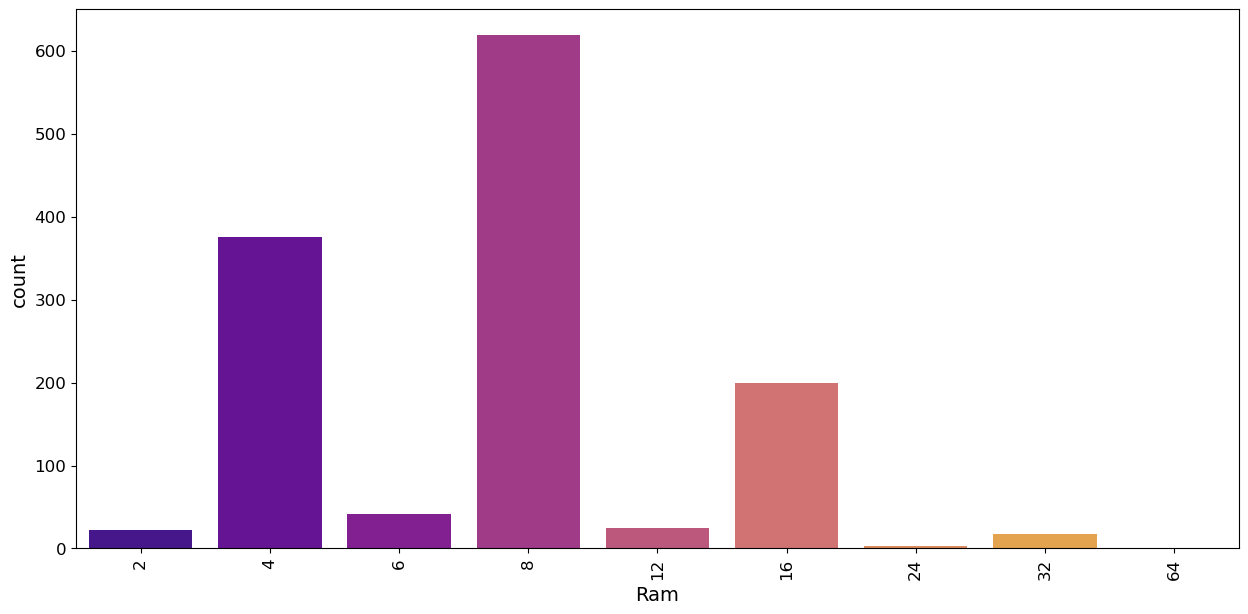

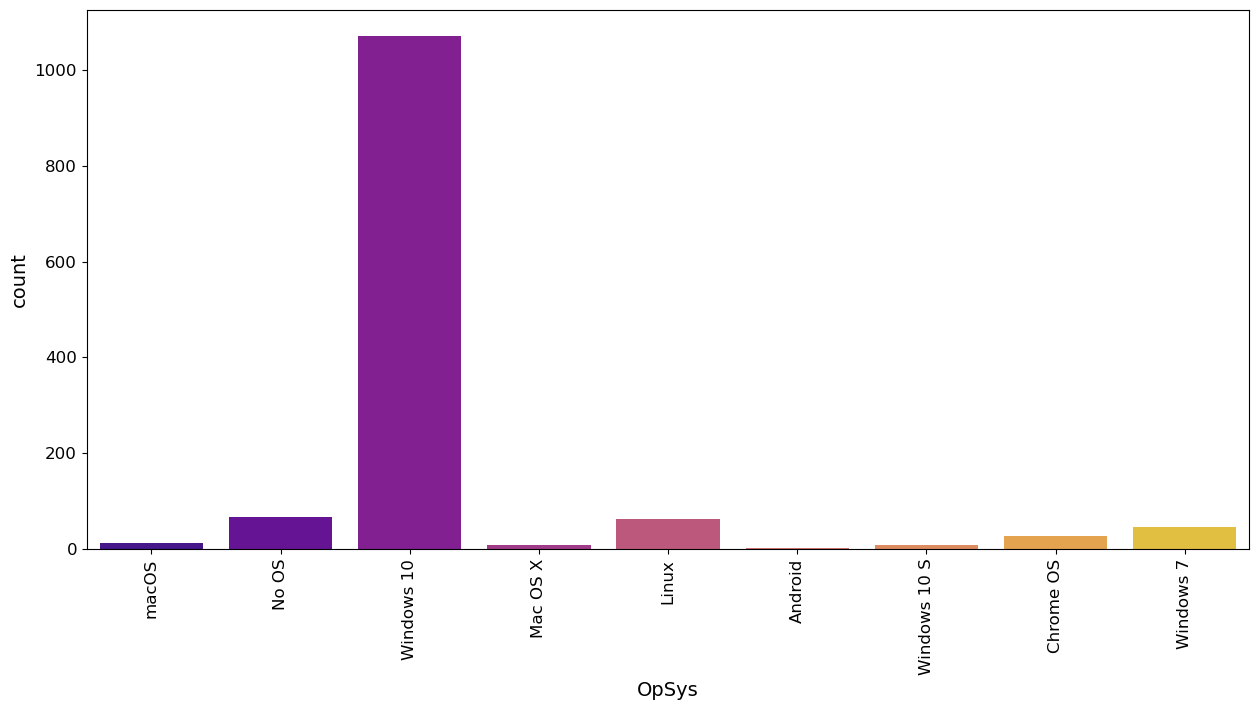

In [14]:
columns=['Company', 'TypeName', 'Ram', 'OpSys']

def plot(col):
    plt.figure(figsize=(15,7))
    sns.countplot(x=df[col], palette='plasma')
    plt.xticks(rotation= 'vertical', fontsize= 12)
    plt.yticks(fontsize= 12)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('count',fontsize=14)
    
for col in columns:
    plot(col)
plt.show()

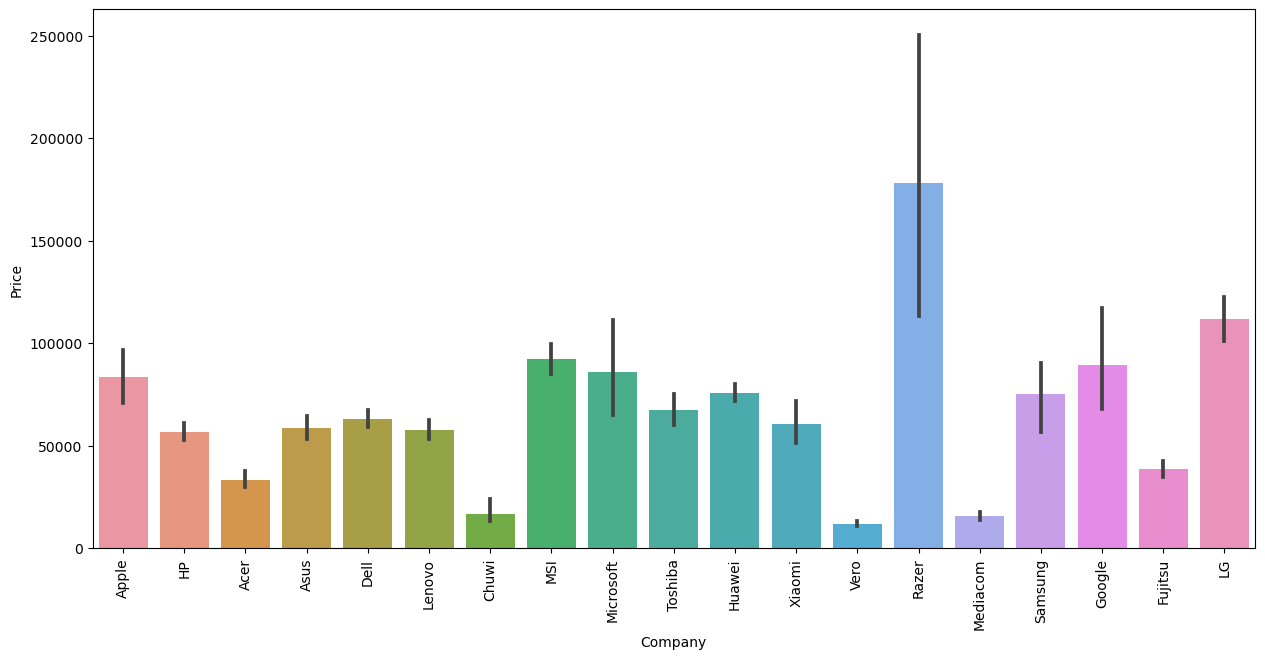

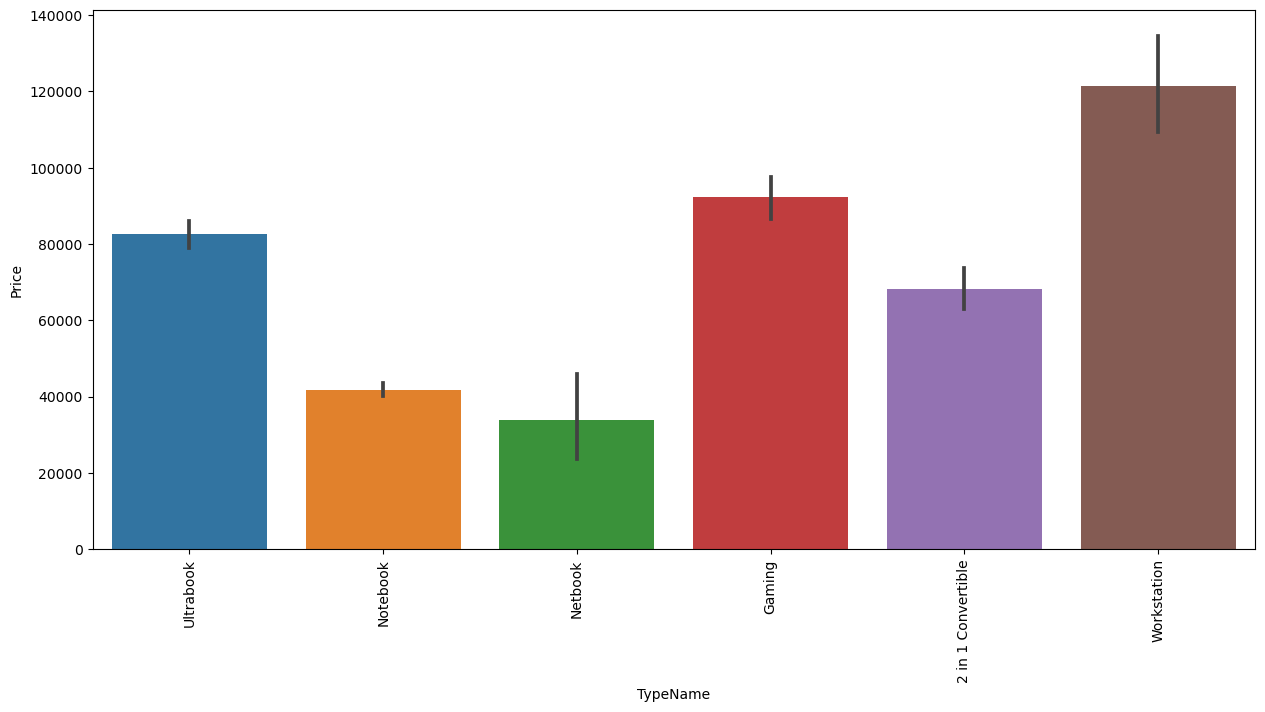

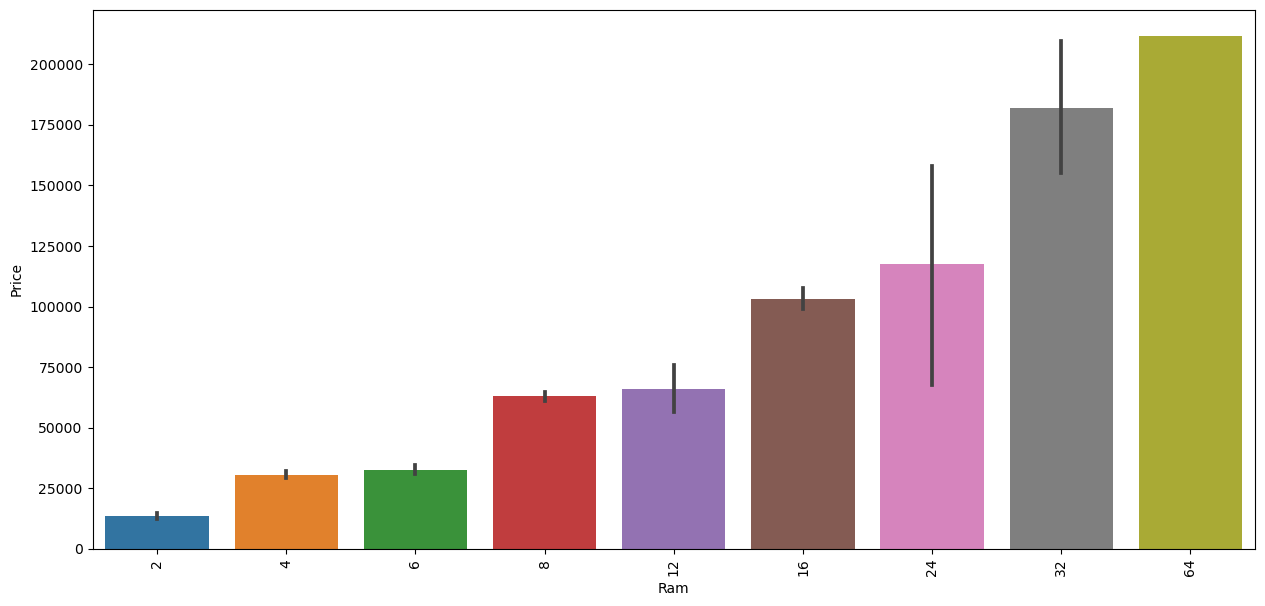

In [15]:
def comparison(col):
    plt.figure(figsize=(15,7))
    sns.barplot(x=df[col] , y=df['Price'])
    plt.xticks(rotation='vertical')
    
for col in columns[:3]:
    comparison(col)
plt.show()

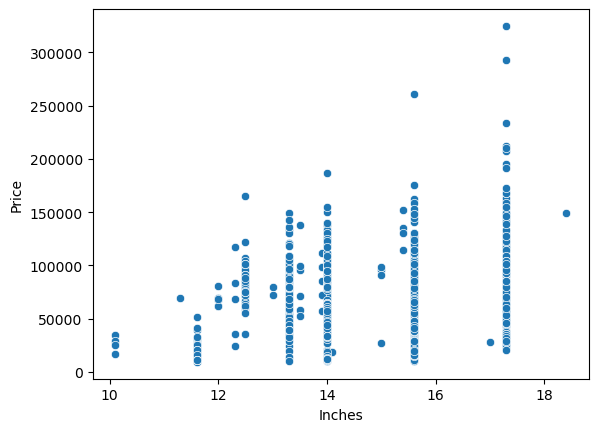

In [16]:
sns.scatterplot(x=df['Inches'], y=df['Price'])
plt.show()

In [17]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895


In [18]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [19]:
df['TouchScreen']=df['ScreenResolution'].apply(lambda x: 'yes' if 'Touchscreen' in x else 'no')

In [20]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
19,Dell,Ultrabook,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,128GB SSD,Intel UHD Graphics 620,Windows 10,1.22,52161,yes
504,Lenovo,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,16GB SSD,Intel HD Graphics 400,Chrome OS,1.25,14119,no
349,Dell,Ultrabook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,1TB HDD,AMD Radeon 530,Windows 10,1.90,35324,no
546,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.87,41824,no
1022,HP,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.11,61218,no


In [21]:
df['IPS']=df['ScreenResolution'].apply(lambda x: 'yes' if 'IPS' in x else 'no')
df.sample(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
869,Dell,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia Quadro M620,Windows 10,2.23,94731,no,no
333,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Windows 10,1.85,23922,no,no
1061,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,1TB HDD,Nvidia GeForce GTX 965M,No OS,4.00,53173,no,yes
650,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,32,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.80,149130,no,yes


In [22]:
split= df['ScreenResolution'].str.split('x' , n=1, expand= True)
split

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [23]:
split[0].unique()

array(['IPS Panel Retina Display 2560', '1440', 'Full HD 1920',
       'IPS Panel Retina Display 2880', '1366', 'IPS Panel Full HD 1920',
       'IPS Panel Retina Display 2304',
       'IPS Panel Full HD / Touchscreen 1920',
       'Full HD / Touchscreen 1920', 'Touchscreen / Quad HD+ 3200',
       'IPS Panel Touchscreen 1920', 'Touchscreen 2256',
       'Quad HD+ / Touchscreen 3200', 'IPS Panel 1366',
       'IPS Panel 4K Ultra HD / Touchscreen 3840',
       'IPS Panel Full HD 2160', '4K Ultra HD / Touchscreen 3840',
       'Touchscreen 2560', '1600', 'IPS Panel 4K Ultra HD 3840',
       '4K Ultra HD 3840', 'Touchscreen 1366', 'IPS Panel Full HD 1366',
       'IPS Panel 2560', 'IPS Panel Full HD 2560',
       'IPS Panel Retina Display 2736', 'Touchscreen 2400', '2560',
       'IPS Panel Quad HD+ 2560', 'IPS Panel Quad HD+ 3200',
       'IPS Panel Quad HD+ / Touchscreen 3200',
       'IPS Panel Touchscreen 1366', '1920',
       'IPS Panel Touchscreen / 4K Ultra HD 3840',
       'IPS Pa

In [24]:
split['xres']=split[0].str.extract(r'(\d{4})')
split

,0,1,xres
0,IPS Panel Retina Display 2560,1600,2560
1,1440,900,1440
2,Full HD 1920,1080,1920
3,IPS Panel Retina Display 2880,1800,2880
4,IPS Panel Retina Display 2560,1600,2560
...,...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080,1920
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800,3200
1300,1366,768,1366
1301,1366,768,1366


In [25]:
split['xres'].value_counts()

1920    846
1366    308
3840     43
2560     29
3200     27
1600     23
2304      6
2256      6
1440      4
2880      4
2400      4
2160      2
2736      1
Name: xres, dtype: int64

In [26]:
df['x_res']=split['xres']
df['y_res']=split[1]

In [27]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,no,yes,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,no,no,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,no,no,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,no,yes,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,no,yes,2560,1600


In [28]:
df['x_res'].value_counts()

1920    846
1366    308
3840     43
2560     29
3200     27
1600     23
2304      6
2256      6
1440      4
2880      4
2400      4
2160      2
2736      1
Name: x_res, dtype: int64

In [29]:
df['y_res'].value_counts()

1080    841
768     308
2160     43
1800     31
1440     31
900      27
1600     10
1504      6
1200      5
1824      1
Name: y_res, dtype: int64

In [30]:
print(df['x_res'].dtype)
print(df['y_res'].dtype)

object
object


In [31]:
df['x_res']=df['x_res'].astype(int)
df['y_res']=df['y_res'].astype(int)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   int32  
 11  TouchScreen       1303 non-null   object 
 12  IPS               1303 non-null   object 
 13  x_res             1303 non-null   int32  
 14  y_res             1303 non-null   int32  
dtypes: float64(2), int32(4), object(9)
memory usage: 132.5+ KB


<AxesSubplot:>

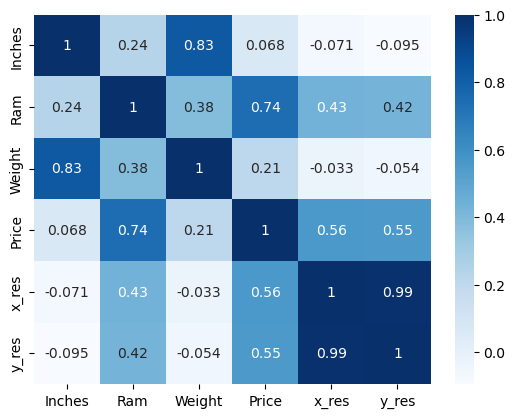

In [33]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [34]:
df.corr()['Price']

Inches    0.068196
Ram       0.743007
Weight    0.210370
Price     1.000000
x_res     0.556529
y_res     0.552809
Name: Price, dtype: float64

PPI = √((Horizontal pixels)^2 + (Vertical pixels)^2) / Diagonal size (inches)



In [35]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,x_res,y_res
376,Lenovo,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Quad Core N3450 1.1GHz,4,128GB SSD,Intel HD Graphics 500,Windows 10,1.59,29463,no,yes,1366,768


In [36]:
df['PPI']=((df['x_res']**2 + df['y_res']**2)**0.5)/df['Inches']

In [37]:
df['PPI'] = df['PPI'].astype(float)

In [38]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,x_res,y_res,PPI
615,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.00,62231,no,no,1920,1080,127.335675
404,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.80,119826,no,no,1920,1080,127.335675
1077,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,3.78,133146,no,no,1920,1080,127.335675
926,Lenovo,Ultrabook,12.5,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,87912,no,yes,1920,1080,176.232574
761,Dell,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16,256GB SSD,Intel HD Graphics 620,Windows 10,1.18,99047,no,no,1920,1080,176.232574


In [39]:
df.corr()['Price']

Inches    0.068196
Ram       0.743007
Weight    0.210370
Price     1.000000
x_res     0.556529
y_res     0.552809
PPI       0.473487
Name: Price, dtype: float64

In [40]:
df.drop(['ScreenResolution','x_res', 'y_res'],axis=1, inplace = True)
df.sample(2)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
386,Lenovo,Notebook,13.3,Intel Core i3 7100U 2.4GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.5,29250,no,yes,165.632118
806,Toshiba,Notebook,15.6,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.1,41558,no,no,100.454670


In [41]:
print(df['Cpu'].nunique())
df['Cpu'].unique()

118


array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [42]:
text = 'Intel Core i5 2.3GHz'

In [43]:
' '.join(text.split()[:3])

'Intel Core i5'

In [44]:
df['CPU'] = df['Cpu'].apply(lambda x : ' '.join(x.split()[:3]))

In [45]:
df.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU
146,HP,Ultrabook,12.5,Intel Core M 6Y75 1.2GHz,8,512GB SSD,Intel HD Graphics 515,Windows 10,0.97,107305,yes,yes,352.465147,Intel Core M
893,Lenovo,Ultrabook,14.0,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.32,95850,no,yes,157.350512,Intel Core i5
28,Dell,Ultrabook,15.6,Intel Core i7 8650U 1.9GHz,8,256GB SSD + 256GB SSD,Intel UHD Graphics 620,Windows 10,1.88,69157,no,no,141.211998,Intel Core i7
278,Lenovo,Notebook,17.3,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Windows 10,2.80,26053,no,no,106.113062,Intel Core i3
546,Lenovo,Notebook,14.0,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.87,41824,no,no,157.350512,Intel Core i5


In [46]:
df['CPU'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

In [47]:
def processor(name):
    if name == 'Intel Core i7' or name == 'Intel Core i5' or name == 'Intel Core i3':
        return name
    else:
        if name.split()[0] == 'Intel':
            return 'intel old version'
        else:
            return 'AMD Processor'
        
df['CPU'] = df['CPU'].apply(lambda name: processor(name))


In [48]:
df.sample(3)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU
11,HP,Notebook,15.6,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,No OS,1.86,18381,no,no,141.211998,Intel Core i3
338,Asus,Notebook,15.6,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Linux,2.00,14651,no,no,100.454670,intel old version
1245,Asus,Gaming,15.6,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,85248,no,yes,141.211998,Intel Core i7


In [49]:
df['CPU'].value_counts()

Intel Core i7        527
Intel Core i5        423
intel old version    154
Intel Core i3        136
AMD Processor         63
Name: CPU, dtype: int64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


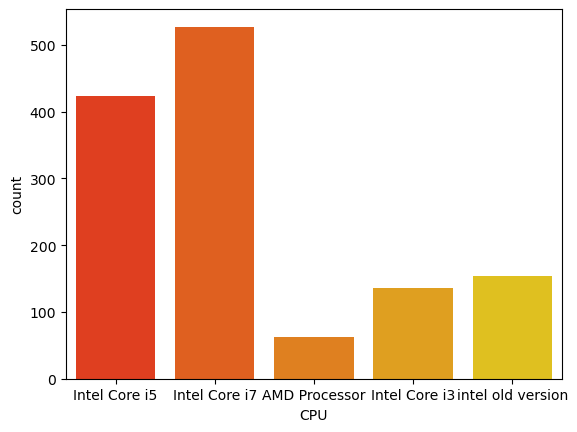

In [50]:
sns.countplot(df['CPU'], palette='autumn')
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


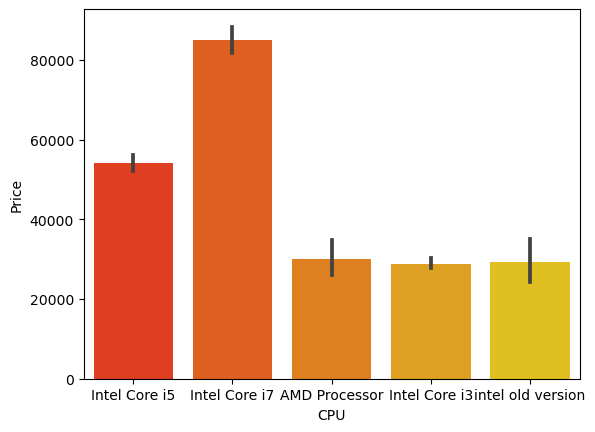

In [51]:
sns.barplot(df['CPU'],df['Price'], palette = 'autumn')
plt.show()

In [52]:
df.head(1)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,no,yes,226.983005,Intel Core i5


In [53]:
df.drop('Cpu', axis=1, inplace=True)

In [54]:
df.head(2)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,no,yes,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,no,no,127.677940,Intel Core i5


In [55]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [56]:
new_df= df['Memory'].str.split('+', n=1 , expand = True)

In [57]:
new_df

,0,1
0,128GB SSD,None
1,128GB Flash Storage,None
2,256GB SSD,None
3,512GB SSD,None
4,256GB SSD,None
...,...,...
1298,128GB SSD,None
1299,512GB SSD,None
1300,64GB Flash Storage,None
1301,1TB HDD,None


In [58]:
new_df['memory'] = df['Memory']
new_df

,0,1,memory
0,128GB SSD,None,128GB SSD
1,128GB Flash Storage,None,128GB Flash Storage
2,256GB SSD,None,256GB SSD
3,512GB SSD,None,512GB SSD
4,256GB SSD,None,256GB SSD
...,...,...,...
1298,128GB SSD,None,128GB SSD
1299,512GB SSD,None,512GB SSD
1300,64GB Flash Storage,None,64GB Flash Storage
1301,1TB HDD,None,1TB HDD


In [59]:
new_df[0] = new_df[0].str.replace('GB', '')
new_df[0] = new_df[0].str.replace('TB' , '000')

In [60]:
new_df[1] = new_df[1].str.replace('GB', '')
new_df[1] = new_df[1].str.replace('TB' , '000')

In [61]:
new_df[1] = new_df[1].fillna(0)

In [62]:
new_df.sample(10)

,0,1,memory
1259,128 SSD,1000 HDD,128GB SSD + 1TB HDD
292,1000 HDD,0,1TB HDD
1238,128 SSD,1000 HDD,128GB SSD + 1TB HDD
59,256 SSD,0,256GB SSD
976,508 Hybrid,0,508GB Hybrid
1163,1000 HDD,0,1TB HDD
189,128 SSD,1000 HDD,128GB SSD + 1TB HDD
185,512 SSD,0,512GB SSD
441,256 SSD,0,256GB SSD
1193,256 Flash Storage,0,256GB Flash Storage


In [63]:
def storage(value):
    new_df[value+'0']= new_df[0].apply(lambda x: x if value in x else 0)
    
st=['SSD','HDD','Flash Storage','Hybrid']
for value in st:
    storage(value)

In [64]:
new_df.sample(10)

,0,1,memory,SSD0,HDD0,Flash Storage0,Hybrid0
507,1000 HDD,0,1TB HDD,0,1000 HDD,0,0
115,256 SSD,0,256GB SSD,256 SSD,0,0,0
1231,1000 SSD,0,1TB SSD,1000 SSD,0,0,0
775,2000 HDD,0,2TB HDD,0,2000 HDD,0,0
886,1000 HDD,0,1TB HDD,0,1000 HDD,0,0
220,256 SSD,0,256GB SSD,256 SSD,0,0,0
15,256 SSD,0,256GB SSD,256 SSD,0,0,0
759,256 SSD,0,256GB SSD,256 SSD,0,0,0
813,1000 HDD,0,1TB HDD,0,1000 HDD,0,0
717,500 HDD,0,500GB HDD,0,500 HDD,0,0


In [65]:
new_df[1]=new_df[1].astype(str)

In [66]:
def storage_1(value):
    new_df[value+'1']= new_df[1].apply(lambda x: x if value in x else 0)
    
st=['SSD','HDD','Flash Storage','Hybrid']
for value in st:
    storage_1(value)

In [67]:
new_df.sample(5)

,0,1,memory,SSD0,HDD0,Flash Storage0,Hybrid0,SSD1,HDD1,Flash Storage1,Hybrid1
971,256 SSD,0,256GB SSD,256 SSD,0,0,0,0,0,0,0
1107,256 SSD,0,256GB SSD,256 SSD,0,0,0,0,0,0,0
1085,500 HDD,0,500GB HDD,0,500 HDD,0,0,0,0,0,0
180,256 SSD,2000 HDD,256GB SSD + 2TB HDD,256 SSD,0,0,0,0,2000 HDD,0,0
870,500 HDD,0,500GB HDD,0,500 HDD,0,0,0,0,0,0


In [68]:
st=['SSD0','HDD0','Flash Storage0','Hybrid0','SSD1','HDD1','Flash Storage1','Hybrid1']
for col in st:
    new_df[col]=new_df[col].astype(str)

In [69]:
def numeric(value):
        new_df[value]=new_df[value].str.replace(r'\D' , '')
    
for value in st:
    numeric(value)

C:\Users\USER\AppData\Local\Temp\ipykernel_13988\1859979561.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  new_df[value]=new_df[value].str.replace(r'\D' , '')


In [70]:
new_df.sample(5)

,0,1,memory,SSD0,HDD0,Flash Storage0,Hybrid0,SSD1,HDD1,Flash Storage1,Hybrid1
402,256 SSD,1000 HDD,256GB SSD + 1TB HDD,256,0,0,0,0,1000,0,0
1223,256 SSD,0,256GB SSD,256,0,0,0,0,0,0,0
161,256 SSD,0,256GB SSD,256,0,0,0,0,0,0,0
843,128 SSD,0,128GB SSD,128,0,0,0,0,0,0,0
694,256 SSD,0,256GB SSD,256,0,0,0,0,0,0,0


In [71]:
for col in st:
    new_df[col]=new_df[col].astype(int)

In [72]:
new_df['ssd']= new_df['SSD0'] + new_df['SSD1']
new_df['hdd']= new_df['HDD0'] + new_df['HDD1']
new_df['flash']= new_df['Flash Storage0'] + new_df['Flash Storage1']
new_df['hybrid']= new_df['Hybrid0'] + new_df['Hybrid1']

In [76]:
new_df.sample(5)

,0,1,memory,SSD0,HDD0,Flash Storage0,Hybrid0,SSD1,HDD1,Flash Storage1,Hybrid1,ssd,hdd,flash,hybrid
942,500 HDD,0,500GB HDD,0,500,0,0,0,0,0,0,0,500,0,0
121,256 SSD,2000 HDD,256GB SSD + 2TB HDD,256,0,0,0,0,2000,0,0,256,2000,0,0
268,1000 HDD,0,1TB HDD,0,1000,0,0,0,0,0,0,0,1000,0,0
1188,256 SSD,0,256GB SSD,256,0,0,0,0,0,0,0,256,0,0,0
159,500 HDD,0,500GB HDD,0,500,0,0,0,0,0,0,0,500,0,0


In [77]:
df['SSD(GB)'] = new_df['ssd']
df['HDD(GB)'] = new_df['hdd']
df['Flash Storage(GB)'] = new_df['flash']
df['Hybrid(GB)'] = new_df['hybrid']

In [83]:
df.sample(5)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU,SSD(GB),HDD(GB),Flash Storage(GB),Hybrid(GB)
860,Lenovo,Notebook,15.6,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,45323,no,yes,141.211998,Intel Core i5,0,1000,0,0
765,Acer,Notebook,13.3,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.60,34898,no,no,117.826530,Intel Core i5,128,0,0,0
1267,Dell,Notebook,15.6,8,1TB HDD,AMD Radeon R5 M430,Linux,2.30,42943,no,no,100.454670,Intel Core i7,0,1000,0,0
1279,Lenovo,Notebook,15.6,8,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,47898,no,yes,141.211998,Intel Core i7,0,1000,0,0
492,Asus,Gaming,15.6,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,1.99,71928,no,no,141.211998,Intel Core i7,128,1000,0,0


In [85]:
df.drop('Memory', axis=1, inplace = True)

In [86]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU,SSD(GB),HDD(GB),Flash Storage(GB),Hybrid(GB)
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378,no,yes,226.983005,Intel Core i5,128,0,0,0
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895,no,no,127.677940,Intel Core i5,0,0,128,0
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636,no,no,141.211998,Intel Core i5,256,0,0,0
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195,no,yes,220.534624,Intel Core i7,512,0,0,0
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095,no,yes,226.983005,Intel Core i5,256,0,0,0


In [87]:
df.corr()['Price']

Inches               0.068196
Ram                  0.743007
Weight               0.210370
Price                1.000000
PPI                  0.473487
SSD(GB)              0.670799
HDD(GB)             -0.093701
Flash Storage(GB)   -0.040511
Hybrid(GB)           0.008747
Name: Price, dtype: float64

In [89]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [95]:
df['Gpu Brands'] = df['Gpu'].str.split().str[0]

In [97]:
df.sample(5)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU,SSD(GB),HDD(GB),Flash Storage(GB),Hybrid(GB),Gpu Brands
236,Acer,Notebook,15.6,4,Intel HD Graphics 520,Linux,2.10,20779,no,no,100.454670,Intel Core i3,0,1000,0,0,Intel
887,Asus,Gaming,17.3,12,Nvidia GeForce GTX 1050,Windows 10,2.20,72988,no,no,127.335675,Intel Core i5,128,1000,0,0,Nvidia
380,HP,Gaming,17.3,8,Nvidia GeForce GTX 1050,Windows 10,3.35,63456,no,yes,127.335675,Intel Core i7,128,1000,0,0,Nvidia
794,Apple,Ultrabook,12.0,8,Intel HD Graphics 5300,Mac OS X,0.92,62071,no,yes,226.415547,intel old version,0,0,512,0,Intel
528,Dell,Notebook,15.6,4,AMD Radeon R5 M430,Windows 10,2.30,31168,no,no,141.211998,Intel Core i5,0,500,0,0,AMD


In [98]:
df.drop('Gpu' , axis=1, inplace= True)

In [99]:
df.sample(5)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU,SSD(GB),HDD(GB),Flash Storage(GB),Hybrid(GB),Gpu Brands
702,Lenovo,Notebook,15.6,8,Windows 10,2.200,22857,no,no,100.454670,AMD Processor,0,1000,0,0,AMD
104,Microsoft,Ultrabook,13.5,8,Windows 10 S,1.252,71395,yes,no,200.842560,Intel Core i5,256,0,0,0,Intel
696,Lenovo,2 in 1 Convertible,14.0,16,Windows 10,1.380,93186,yes,no,157.350512,Intel Core i7,512,0,0,0,Intel
806,Toshiba,Notebook,15.6,4,Windows 10,2.100,41558,no,no,100.454670,Intel Core i5,0,500,0,0,Intel
420,Lenovo,2 in 1 Convertible,15.6,16,Windows 10,2.000,101178,yes,yes,282.423996,Intel Core i7,512,0,0,0,Nvidia


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


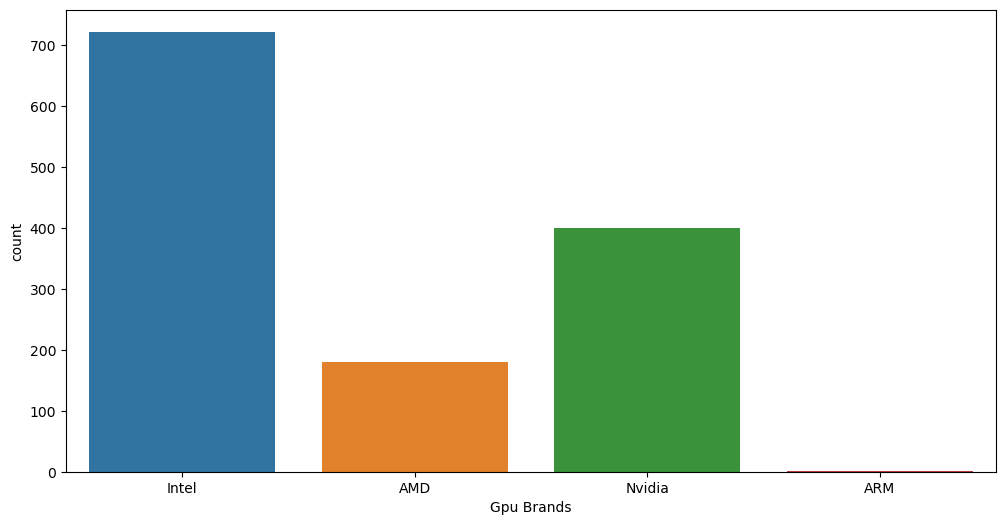

In [104]:
plt.figure(figsize=(12,6))
sns.countplot(df['Gpu Brands'])
plt.show()